## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [22]:
# Use this cell to begin your analysis, and add as many as you would like!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
office = pd.read_csv("datasets/office_episodes.csv")

In [24]:
office.sample(5)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
126,126,7,China,Pam stands up to Dwight when he makes cutbacks...,8.2,2246,7.31,30,2010-12-02,NaN,Charles McDougall,Halsted Sullivan | Warren Lieberstein,False,0.5000
91,91,6,Gossip,Michael regrets revealing that Stanley is havi...,8.8,2866,8.20,30,2009-09-17,NaN,Paul Lieberstein,Paul Lieberstein,False,0.6875
74,74,5,Moroccan Christmas,Phyllis blackmails Angela into doing the work ...,8.4,2613,8.79,30,2008-12-11,NaN,Paul Feig,Justin Spitzer,False,0.5625
94,94,6,Niagara: Part 1,The Office travels to Niagara Falls to celebra...,9.4,4560,9.42,30,2009-10-08,NaN,Paul Feig,Greg Daniels | Mindy Kaling,False,0.8750
172,172,9,The Target,Angela orders a hit on Oscar for cheating with...,7.8,1928,3.88,22,2012-11-29,NaN,Brent Forrester,Graham Wagner,False,0.3750


Text(0.5, 1.0, 'Popularity, Quality, and Guest Appearances on the Office')

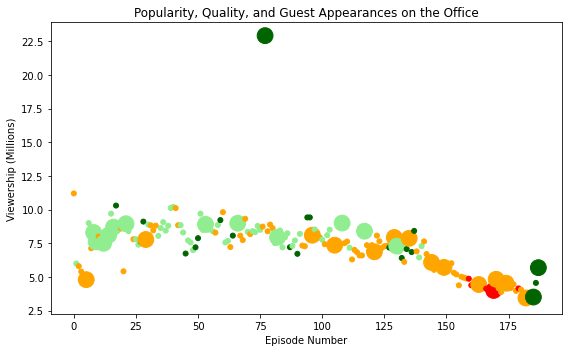

In [25]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [8, 5]
colors = []

for lab, row in office.iterrows():
    if row["scaled_ratings"] < 0.25:
        colors.append("red")
    elif (row["scaled_ratings"] >= 0.25) and (row["scaled_ratings"] < 0.50):
        colors.append("orange")
    elif (row["scaled_ratings"] >= 0.50) and (row["scaled_ratings"] < 0.75):
        colors.append("lightgreen")
    elif row["scaled_ratings"] >= 0.75:
        colors.append("darkgreen")

marker_sizes = []

for lab, row in office.iterrows():
    if row['has_guests'] == False:
        marker_sizes.append(25)
    else:
        marker_sizes.append(250)


plt.scatter(office["episode_number"], office["viewership_mil"], c = colors, s = marker_sizes)
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')

In [26]:
office[office['viewership_mil'] == office[office["has_guests"]]['viewership_mil'].max()]["guest_stars"]

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [27]:
top_star = "Jack Black"